# Binning And Binarization used to convert numerical data into categorical data 


# Discretization or Binning 
Discretization is a process of converting /Transforming contiguous variable into discrete variable by creating a set of contiguous interval that span the range of the variable value
Discretization is also called binning ,where a bin is an alternative name for interval

# Why to use Discretization
1) To Handle Outlier
2) To improve the value spread

# Binning Divided into 3 Part
1) Unsupervised Binning
2) Supervised Binning
3) Custom Binning
   

# Unsupervised Binning Divided into 3 Part
1) Equal Width(uniform) Binning
2) Equal Frequency(Quantile) Binning
3) K mean Binning

# Supervised Binning Divided Into 3 Part
DecisionTreeBinning

# Custom Binning
Custom Binning

# Equal Width(Uniform) Binning
let consider age =(27,87,35,65,32)
Then interval classification = (max-min)/bins
for age example 87-27/10 =6         (let bins=10)
so interval is (0,6),(6,12),(12,18),,,,(84,87)

# Benefit of Using Equal Width
1) good for outlier
2) no change in spread

# Equal Frequency/Quantile Binning
Let the interval be 10. Then, in this binning process, we need to take the values up to the 10th percentile of the frequency, such as (0, 16), (16, 20), (20, 22), etc.
Every interval will get the same frequency

# Kmean Binning 
We use this technique when our data is spread into clusters. In this technique, we calculate the distance between all point intervals,s, which will  be the nearest to the point that will be considered in the interval


# Encoding the Discretized Variable
sklearn has a class named KBinDiscretizer() in which we have to give 3 parameters named (Bin=??),(Strategy=(Uniform,Quantile,kmeans)),(Encoding=(ordinal,OneHotEncoding))

In [116]:
import numpy as np
import pandas as pd

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [118]:
import pandas as pd
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [119]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [120]:
df.dropna(inplace=True)

In [121]:
df.shape

(714, 3)

In [122]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [123]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [124]:
x

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [125]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [127]:
x_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [128]:
clf=DecisionTreeClassifier()

In [129]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [130]:
accuracy_score(y_test,y_pred)

0.6363636363636364

In [131]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6288732394366197)

In [132]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [133]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('Second',kbin_age,[1])
])

In [134]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.fit_transform(x_test)

In [135]:
trf.named_transformers_['first'].n_bins_

array([15])

In [136]:
trf.named_transformers_['Second'].n_bins_

array([15])

In [137]:
trf.named_transformers_['first'].bin_edges_

array([array([ 1.        ,  9.        , 15.9       , 17.        , 20.        ,
              21.        , 24.        , 26.        , 28.        , 30.1       ,
              33.66666667, 36.        , 38.6       , 44.06666667, 52.        ,
              62.        ])                                                   ],
      dtype=object)

In [138]:
trf.named_transformers_['Second'].bin_edges_

array([array([  0.        ,   7.17166667,   7.77333333,   7.925     ,
                8.05      ,   9.5       ,  10.5       ,  13.        ,
               17.69333333,  22.62      ,  26.35276667,  31.275     ,
               38.1       ,  53.22666667,  79.27666667, 512.3292    ])],
      dtype=object)

In [139]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [140]:
output['age_labels']=pd.cut(x=x_train['Age'],
                                  bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=x_train['Fare'],
                                    bins=trf.named_transformers_['Second'].bin_edges_[0].tolist())

In [141]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
624,21.0,4.0,16.1000,7.0,"(20.0, 21.0]","(13.0, 17.693]"
845,42.0,12.0,7.5500,1.0,"(38.6, 44.067]","(7.172, 7.773]"
764,16.0,2.0,7.7750,2.0,"(15.9, 17.0]","(7.773, 7.925]"
114,17.0,2.0,14.4583,7.0,"(15.9, 17.0]","(13.0, 17.693]"
20,35.0,10.0,26.0000,9.0,"(33.667, 36.0]","(22.62, 26.353]"


In [142]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)

In [143]:
accuracy_score(y_test,y_pred2)

0.6503496503496503

In [144]:
x_trf=trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6288928012519561)

In [161]:
def discretize(bins, strategy):
    # Create KBinsDiscretizer for Age and Fare
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    # ColumnTransformer
    trf = ColumnTransformer([
        ('first', kbin_age, [0]),   # Age column
        ('second', kbin_fare, [1])  # Fare column
    ])

    # Fit and transform
    x_trf = trf.fit_transform(x)

    # Cross-validated accuracy
    print(f"Strategy: {strategy}")
    print("Mean Accuracy:", np.mean(cross_val_score(DecisionTreeClassifier(), x_trf, y, cv=10, scoring='accuracy')))

    # Plot Age
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Age - Before")

    plt.subplot(122)
    plt.hist(x_trf[:, 0], color='red')
    plt.title("Age - After")
    plt.show()

    # Plot Fare
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Fare - Before")

    plt.subplot(122)
    plt.hist(x_trf[:, 1], color='red')
    plt.title("Fare - After")
    plt.show()


Strategy: uniform
Mean Accuracy: 0.6864632237871675


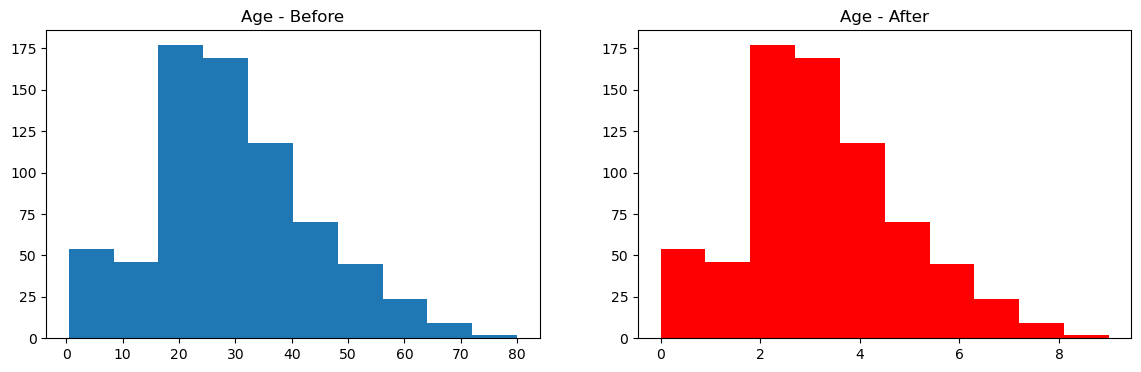

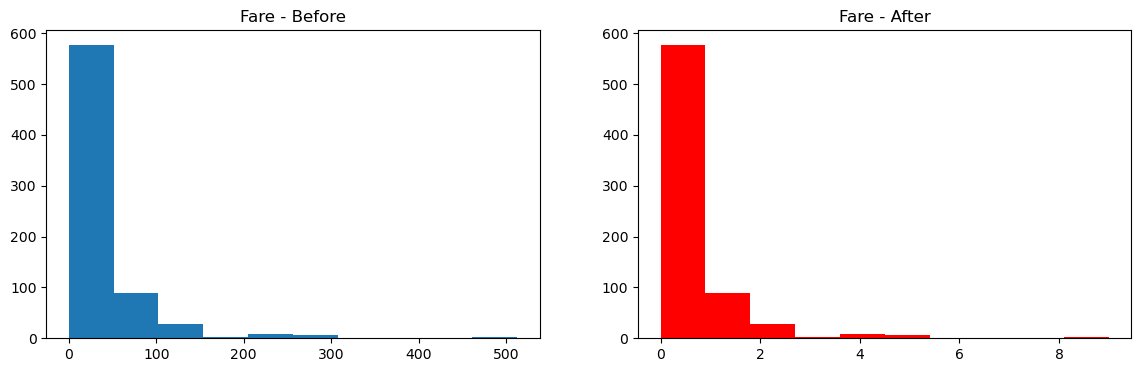

Strategy: quantile
Mean Accuracy: 0.682140062597809


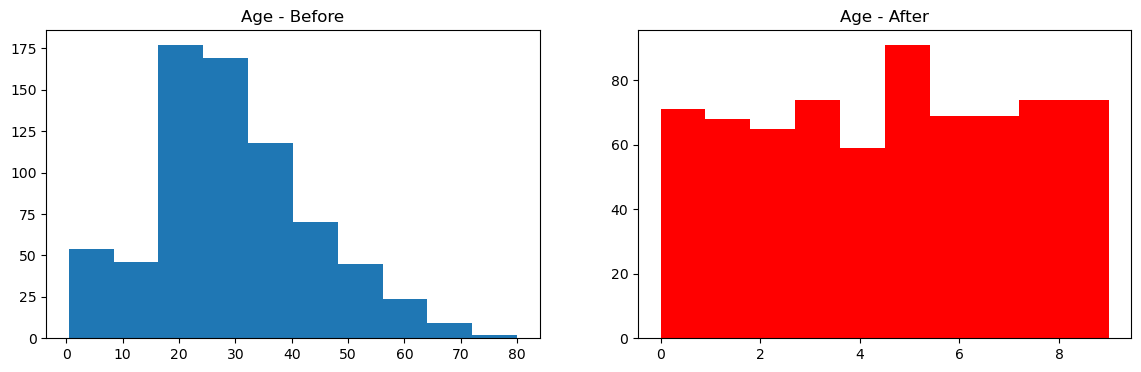

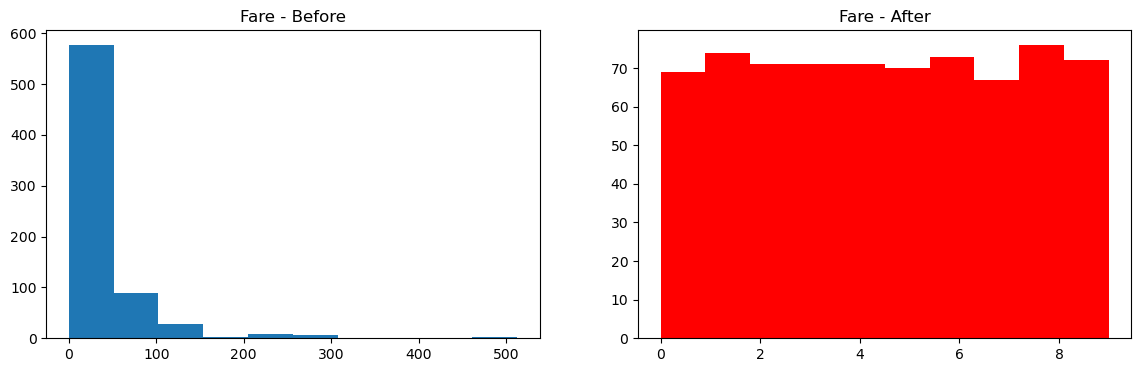

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Strategy: kmeans
Mean Accuracy: 0.6584702660406886


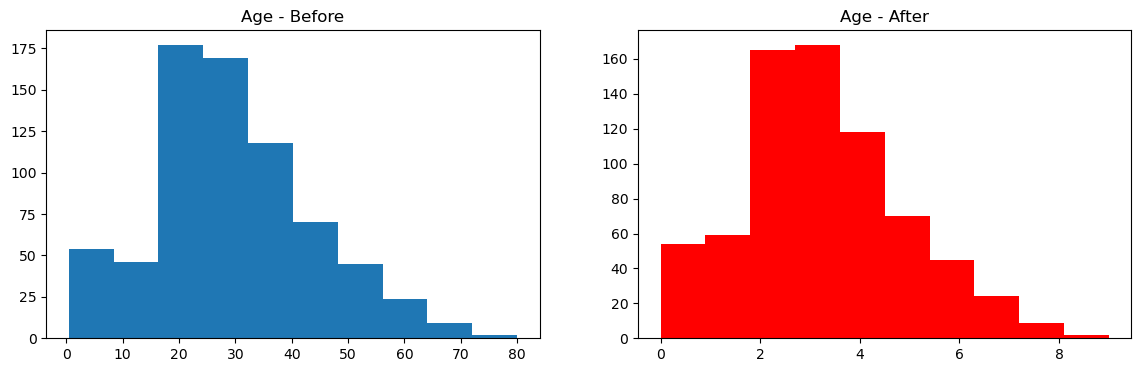

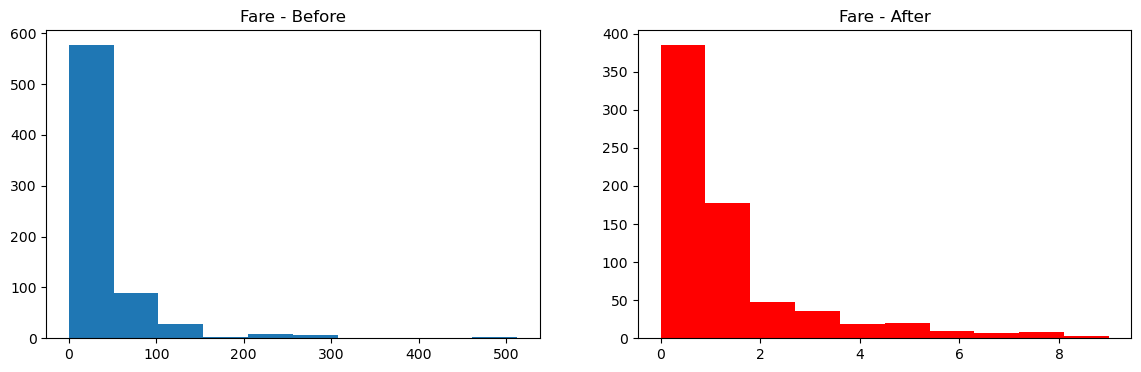

In [163]:
discretize(10, 'uniform')   # Equal-width bins
discretize(10, 'quantile')  # Quantile-based bins
discretize(10,'kmeans')     #kmean

# Binarization is a special category of Binning where we convert the value into binary[0,1].We pass the Threshold value and Copy=True/False 